In [1]:
import os
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import seaborn as sns
sns.set_style('white')
import dataframe_image as dfi
import pickle
from network_setup import *
from data_setup import *
from EnergyCommunityModel import *
from model_eval import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# set up home path
#home_path = os.getcwd()

In [2]:
# set up simulation scope
with open('2022_11_13_filepaths.pickle', 'rb') as handle:
    paths = pickle.load(handle)
date = '2022 11 13 11h43m'
seasons = ['winter', 'summer']
p2p_options = [True, False]
pr_years = [2019, 2022]
pr_dynamic_options = [True, False]
n_steps = 5

In [3]:
# define scenario settings for analysis
scenario_0 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [False]}
scenario_1 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_2 = {'seasons': ['summer', 'winter'], 'p2p_options': [True], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_dict = {'scenario_0': scenario_0, 'scenario_1': scenario_1, 'scenario_2': scenario_2}

In [4]:
# run simulation
batch_runner(paths, seasons,p2p_options,pr_years,pr_dynamic_options, n_steps=n_steps, date=date)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-31


In [8]:
data_dict = get_output_dfs(paths, scenario_dict=scenario_0, date=date)
list(data_dict.keys())

['season_summer_p2p_False_year_2019_dyn_False',
 'season_summer_p2p_False_year_2022_dyn_False',
 'season_winter_p2p_False_year_2019_dyn_False',
 'season_winter_p2p_False_year_2022_dyn_False']

In [4]:
sns.set_style('white')

In [7]:
# calculate certain measure for certain scenario and save df as png
m_dict = calculate_measure(paths, date, scenario_dict=scenario_2, measure='stability')
export_measure_calculation(paths, m_dict)

In [109]:

def plot_all_scenarios(paths, date, scenario_dict, measure = None):
    if measure not in ['welfare', 'stability', 'sustainability']:
        raise Exception('ERROR: please select measure in [welfare, stability, sustainability].')
    scenario_info_dict = dict()
    years_max, seasons_max = 0,0
    # read in basic info for every scenario
    for sc in scenario_dict.keys():
        data_dict, seasons, years, p2p_bool, pr_bool = get_data_and_scenario_info(paths, date, scenario_dict[sc])
        if len(years) > years_max: years_max = len(years)
        if len(seasons) > seasons_max: seasons_max = len(seasons)
        scenario_info_dict[sc] = [data_dict, seasons, years, p2p_bool, pr_bool]
    # set up plot
    nrows, ncols = years_max*seasons_max, len(scenario_dict.keys())
    fig, ax = plt.subplots(figsize = (21,29.7), nrows=nrows, ncols=ncols, sharey=True)
    for col in range(len(scenario_dict.keys())):
        sc = list(scenario_dict.keys())[col]
        row = 0
        data_dict_sc, seasons, years, p2p_bool, pr_bool = scenario_info_dict[sc]
        for year in years:
            for season in seasons:
                mdf = get_mdf(data_dict_sc, year, season)
                plot_mdf(mdf, year=year, sc=sc, season=season, measure = measure, ax = ax[row][col])
                row += 1
    plt.tight_layout()

    # annotate rows and cols header: https://stackoverflow.com/a/25814386
    row_label, col_label = [], []
    

    return fig


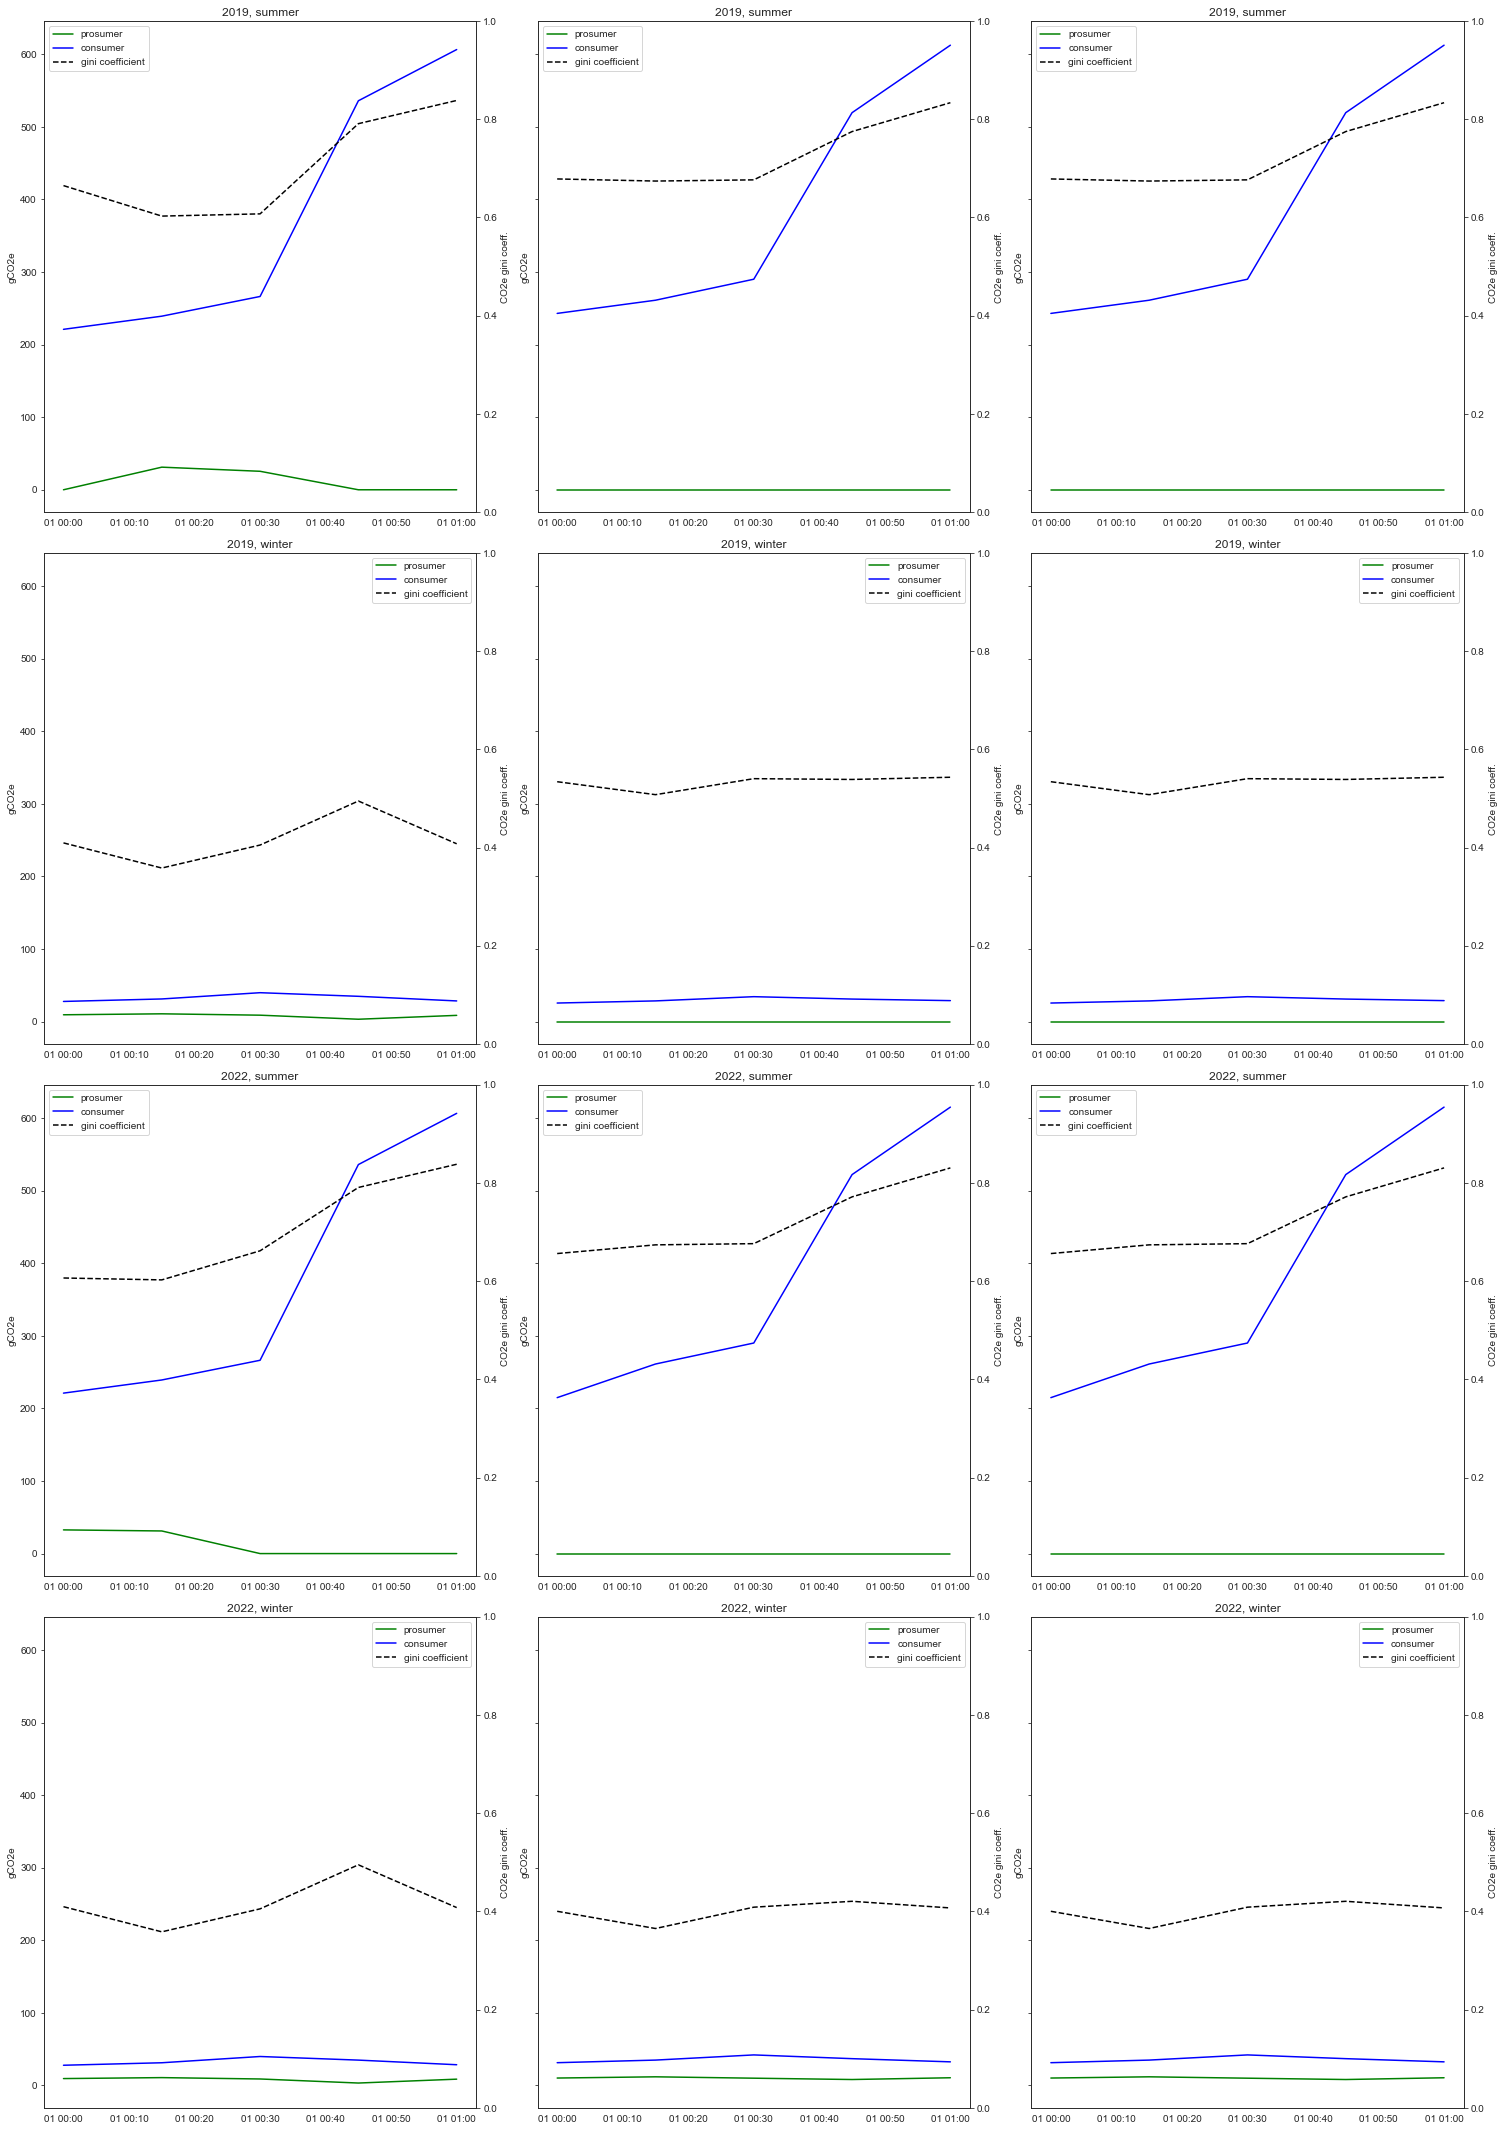

In [112]:
fig = plot_all_scenarios(paths, date, scenario_dict, measure='sustainability')